In [58]:
import matplotlib.pyplot as plt
import cmath

In [49]:
file = open('histogram_complexes_time.dat', 'r')

time = []
B = []
IL = []
BIL = []

for line in file:
    linesplit = line.split()
    
    if linesplit[1] == 'IL:':
        IL.append(int(linesplit[0]))
        
    elif linesplit[1] == 'B:' and len(linesplit) == 3:
        B.append(int(linesplit[0]))
        
    elif linesplit[0] == 'Time':
        time.append(linesplit[2])
    
    else:
        BIL.append(int(linesplit[0]))
    

In [55]:
len(BIL)

5000

In [59]:
def solver(Na, Nb, ka, kb, bound, steps):
    
    Kd = kb/ka
    V = ((bound*2)**3)
    
    
  
    a = -1
    b = (Na - Nb - (Kd*V))
    c = Kd*V*Na

    # calculating  the discriminant
    dis = (b**2) - (4 * a*c)

    # find two results
    ans1 = (-b-cmath.sqrt(dis))/(2 * a)
    ans2 = (-b + cmath.sqrt(dis))/(2 * a)
    
    #calculate b and c
    
    
    if ans1.real > 0:
        nc = Na - ans1.real
        nb = Nb - nc 
        na_array = [ans1.real] * steps
        nb_array = [nb] * steps
        nc_array = [nc] * steps
        return na_array, nb_array, nc_array 
    
    else:
        nc = Na - ans2.real
        nb = Nb - nc 
        na_array = [ans2.real] * steps
        nb_array = [nb] * steps
        nc_array = [nc] * steps
        return na_array, nb_array, nc_array 
        
    



In [60]:
nB_array, nIL_array, nBIL_array = solver(200, 500, 173.59, 0.00209, 100, 5000)

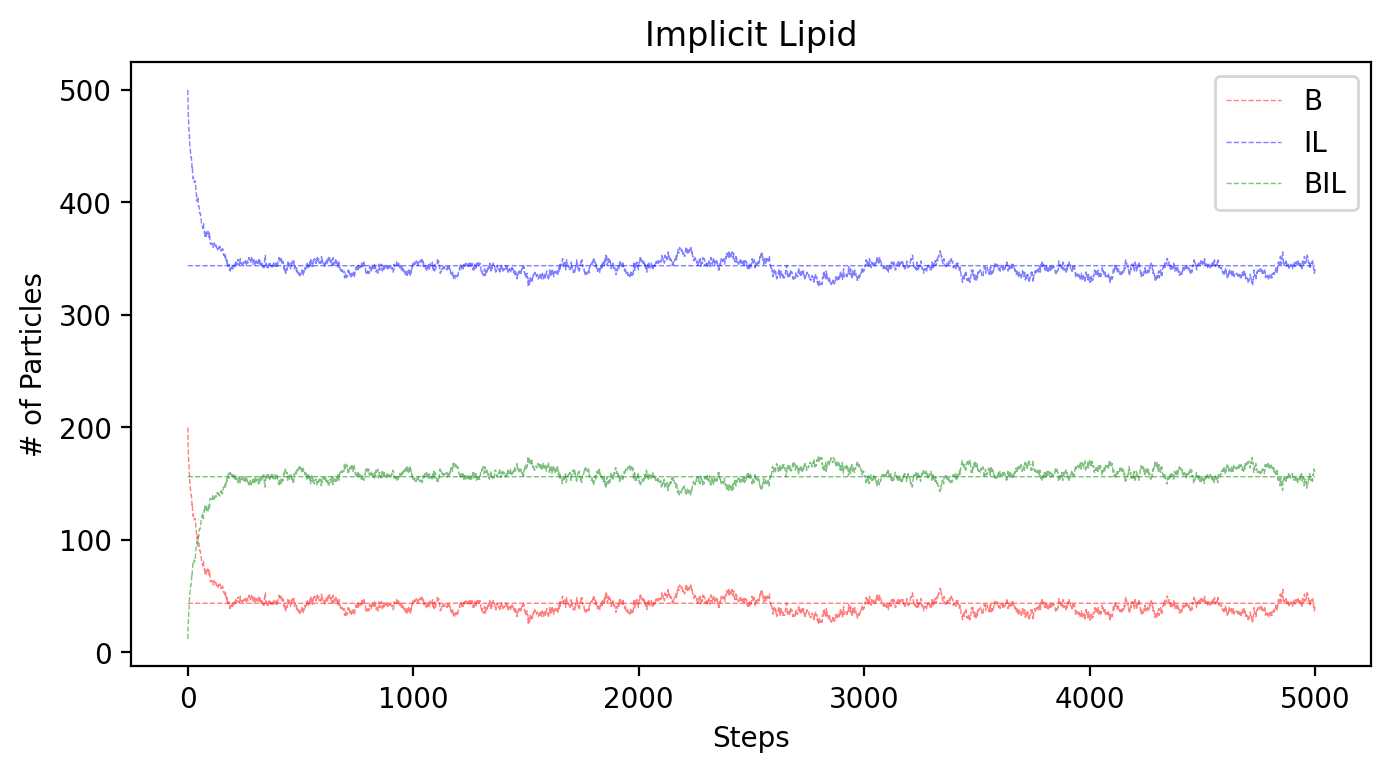

In [62]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
#ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(B,c='red',alpha=0.5,lw=0.5,ls='--', label = 'B');
ax.plot(nB_array,c='red',alpha=0.5,lw=0.5,ls='--');
ax.plot(IL,c='blue',alpha=0.5,lw=0.5,ls='--', label = 'IL');
ax.plot(nIL_array,c='blue',alpha=0.5,lw=0.5,ls='--');
ax.plot(BIL,c='green',alpha=0.5,lw=0.5,ls='--', label = 'BIL');
ax.plot(nBIL_array,c='green',alpha=0.5,lw=0.5,ls='--');

#ax.plot(0, start, c='red', marker='+')
#ax.plot(step_n, stop, c='black', marker='o')
plt.title('Implicit Lipid')
plt.xlabel('Steps')
plt.ylabel('# of Particles')
#plt.tight_layout(pad=0)
plt.legend()
plt.savefig('./implicit lipid.png',dpi=250);